<a href="https://colab.research.google.com/github/Simpleshell3/CMR-Land-Sector-Analysis/blob/main/CMR_Land_Use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analysis of Cameroon's Land Use and Land Cover using Moja's repository of  Land Sector Data**

The aim of this working package is to carry out an analysis of Cameroon land use. It intends to
examine, in addition to the actual land use, the fields of human settlements, transport,
infrastructure, population development and raw material withdrawals.

We will start by installing and importing the necessary packages to support the analysis.

In [ ]:
# Installing packages
!pip install geopandas 
!pip install matplotlib
!apt install proj-bin libproj-dev libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install mapclassify
!pip install geoplot
!pip install seaborn

In [7]:
#Importing packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import mapclassify
from mpl_toolkits.basemap import Basemap
import numpy as np
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import seaborn as sns
import io
import requests

%matplotlib inline

## **DataSet**

This dataset is obtained from [Moja Global's](https://moja.global/) dataset found in their repository at [Land Sector Descriptions](https://github.com/moja-global/Land_Sector_Datasets) and [Moja Global Datasets](https://datasets.mojaglobal.workers.dev/0:/) that can be useful for land sector management.  For each dataset the information is provided on content and licence.

### **CAMEROON'S ECOLOGICAL ZONES**
 An Ecological Zone (EZ) is defined as: 
“A zone or area with broad yet relatively homogeneous natural vegetation 
formations, similar (not necessarily identical) in physiognomy. Boundaries of the 
EZs approximately coincide with the map of Köppen-Trewartha climatic types, 
which was based on temperature and rainfall.


The names of the global Ecological Zones reflect the dominant zonal vegetation. A main principle in delineating the global Ecological Zones involves aggregating or matching regional ecological or potential vegetation maps into the global framework.


In [9]:
# Downloading and displaying Cameroon's Ecological Zones
url1 = "https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byCountry/CMR_AL2_Cameroon_GEZ.json"

a=requests.get(url1).content

df_cgez = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_cgez

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CMR,CM,Cameroon,Tropical dry forest,13,TAwb,2,"POLYGON ((14.47848 11.43935, 14.47721 11.43746..."
1,CMR,CM,Cameroon,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((11.06559 6.71099, 11.06543 6.7..."
2,CMR,CM,Cameroon,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((9.23867 4.06414, 9.28367 4.130..."
3,CMR,CM,Cameroon,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((9.65015 3.63553, 9.65027 3.635..."
4,CMR,CM,Cameroon,Tropical shrubland,14,TBSh,2,"POLYGON ((15.06693 11.24292, 15.06645 11.24952..."
5,CMR,CM,Cameroon,Water,90,Water,2,"POLYGON ((14.54743 12.79636, 14.54883 12.80171..."


In [ ]:
df_cgez1 = pd.merge(df_cwsr, df_cgez, how='outer', on = 'geometry')
df_cgez1

Let us display the data from df_cgez on the map to better appreciate the ecological zone distribution.

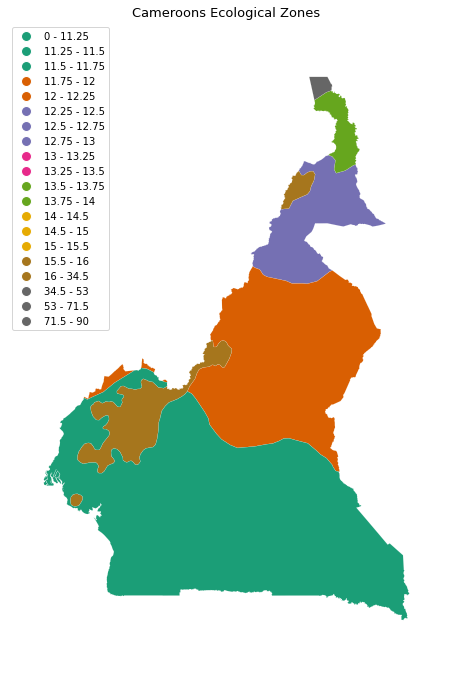

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_cgez['gez_code'], k=20)
 
 #Map
gplt.choropleth(df_cgez, 
    hue="gez_code", 
    linewidth=.1,
    scheme=scheme, cmap='Dark2',
    legend=True,
    edgecolor='white',
    ax=ax
);

ax.set_title('Cameroon''s Ecological Zones', fontsize=13);

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_cgez1['gez_code'], k=20)
 
 #Map
gplt.choropleth(df_cgez1, 
    hue="gez_code", 
    linewidth=.1,
    scheme=scheme, cmap='Dark2',
    legend=True,
    edgecolor='white',
    ax=ax
);

ax.set_title('Cameroon''s Ecological Zones', fontsize=13);

## **Cameroon's Soil Resources.**
Soil resources are a form of environmental asset providing a range of ecosystem services. A key feature of soils is their delivery of supporting services including the formation of and function of the soil itself, nutrient cycling, water cycling, structural support of vegetation and soil biodiversity.

In [20]:
## Downloading and displaying Cameroon's Soil Resources
url2 = "https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byStateWSR/CMR/CMR_ALL_states_WSR.json"

s=requests.get(url2).content

df_cwsr = gpd.read_file(io.StringIO(s.decode('utf-8')))
df_cwsr

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,CMR,CM-AD,Adamawa,AC,23,Acrisol,4,"POLYGON ((13.28546 6.00135, 13.20305 6.08607, ..."
1,CMR,CM-AD,Adamawa,LX,6,Lixisol,4,"MULTIPOLYGON (((15.21116 7.22385, 15.21058 7.2..."
2,CMR,CM-CE,Centre,AC,23,Acrisol,4,"POLYGON ((12.88213 6.00006, 12.51103 6.00048, ..."
3,CMR,CM-CE,Centre,FR,26,Ferralsol,4,"POLYGON ((12.82601 5.26796, 12.78436 5.28206, ..."
4,CMR,CM-ES,East,AC,23,Acrisol,4,"POLYGON ((14.59444 5.61297, 14.58756 5.61565, ..."
5,CMR,CM-ES,East,FR,26,Ferralsol,4,"POLYGON ((13.73193 4.73802, 13.62728 4.82527, ..."
6,CMR,CM-ES,East,LX,6,Lixisol,4,"MULTIPOLYGON (((14.41554 6.04468, 14.41251 6.0..."
7,CMR,CM-EN,Far-North,AR,3,Arenosol,4,"POLYGON ((14.85192 12.54078, 14.85194 12.54232..."
8,CMR,CM-EN,Far-North,GL,7,Gleysol,4,"POLYGON ((14.85192 12.54078, 14.73197 12.55511..."
9,CMR,CM-EN,Far-North,LX,6,Lixisol,4,"POLYGON ((14.33455 10.65256, 14.31497 10.77882..."


/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 11
  Warn("Warning: setting k to %d" % k_q, UserWarning)


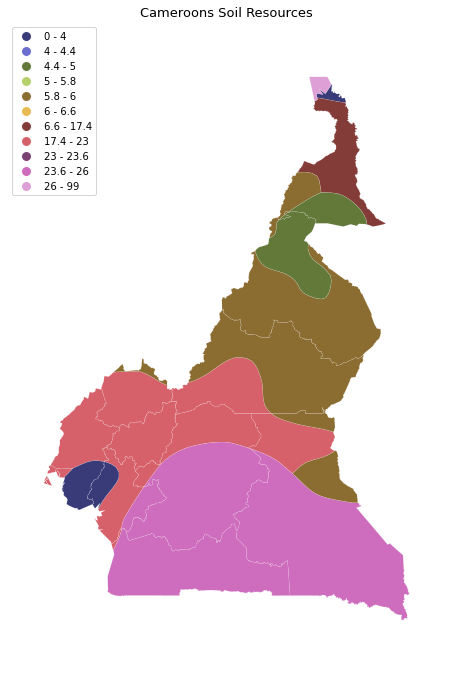

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_cwsr['mg_code'], k=20)
 
 #Map
gplt.choropleth(df_cwsr, 
    hue="mg_code", 
    linewidth=.1,
    scheme=scheme, cmap='tab20b',
    legend=True,
    edgecolor='white',
    ax=ax
);

ax.set_title('Cameroon''s Soil Resources', fontsize=13);

## **Cameroon's Managed Forest Concessions**

Forest concessions are an important instrument used for allocating public forests to a private entity. It is used as a contract to establish the rights to harvest in a given forest area and regulate responsibilities, prices, incentives and sanctions of the government and the concession holder.

In [ ]:
# Downloading and displaying Cameroon's Managed Forest Concessions
url3 = "https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/ManagedForestConcessions/ManagedForestConcessions_CMR.geojson"

d=requests.get(url3).content

df_cmfc = gpd.read_file(io.StringIO(d.decode('utf-8')))
df_cmfc

In [ ]:
df_cmfc1 = pd.merge(df_cwsr, df_cmfc, how='outer', on = 'geometry')
df_cmfc1

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:67: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  'The data being passed to "hue" includes null values. You '


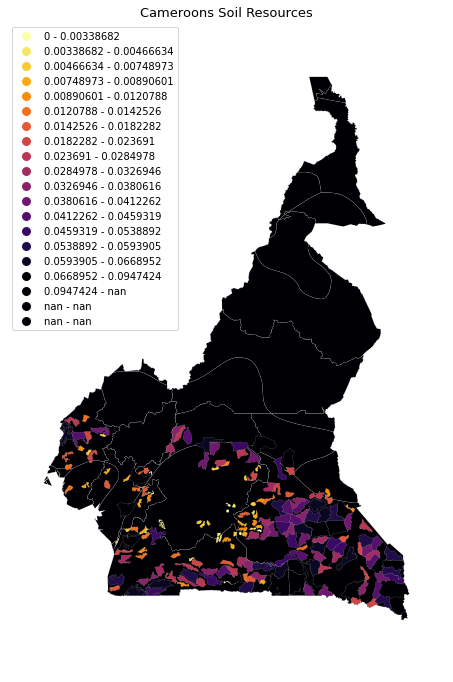

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_cmfc1['Shape_Area'], k=20)
 
 #Map
gplt.choropleth(df_cmfc1, 
    hue="Shape_Area", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='white',
    ax=ax
);

ax.set_title('Cameroon''s Soil Resources', fontsize=13);

# **Distribution of soils by regions**

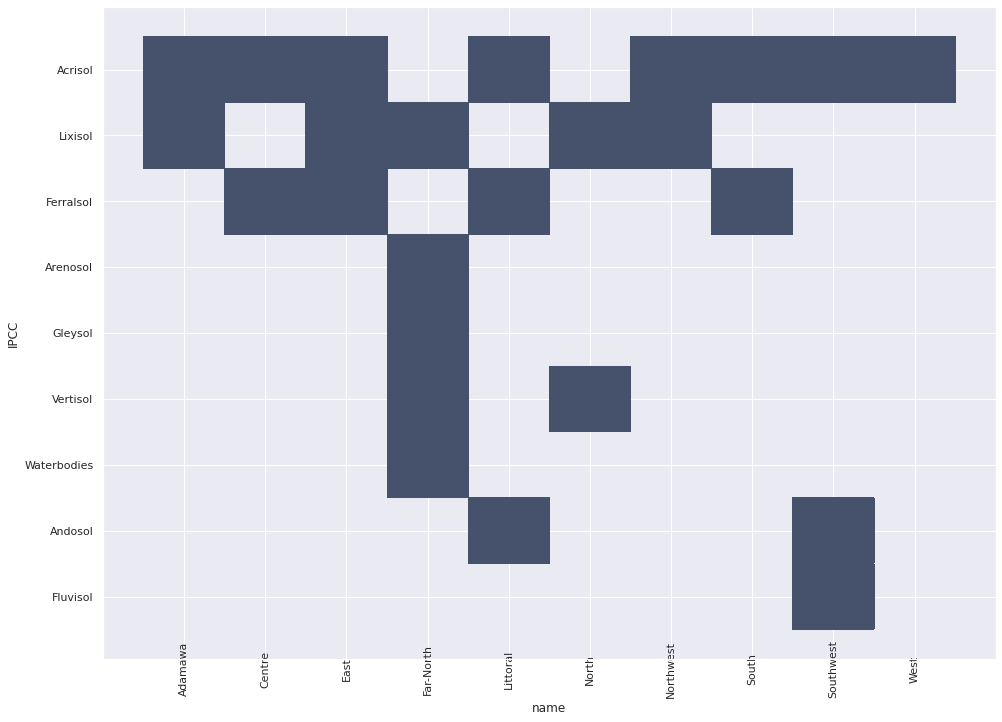

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.set(style="darkgrid")
heat = sns.histplot(data=df_cwsr, x="name", y="IPCC")
#heat.set_xticklabels(heat.get_xticklabels(), rotation=90)  
plt.setp(heat.get_xticklabels(), va="center", rotation=90)
#plt.tick_params(axis='x', which='major', labelsize=30)
plt.show();

# **Distribution Ecological Zones by Region**

In [40]:
# Downloading and displaying Cameroon's Managed Forest Concessions
url4 = "https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/CMR/CMR_ALL_states_GEZ.json"

f=requests.get(url4).content

df_cgez2 = gpd.read_file(io.StringIO(f.decode('utf-8')))
df_cgez2

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CMR,CM-EN,Far-North,Tropical dry forest,13,TAwb,4,"POLYGON ((15.06693 11.24292, 15.04135 11.23288..."
1,CMR,CM-NO,North,Tropical dry forest,13,TAwb,4,"POLYGON ((14.20574 9.99888, 14.20615 10.04953,..."
2,CMR,CM-AD,Adamawa,Tropical moist forest,12,TAwa,4,"POLYGON ((15.21116 7.22385, 15.21058 7.22331, ..."
3,CMR,CM-CE,Centre,Tropical moist forest,12,TAwa,4,"POLYGON ((12.88212 6.00006, 12.51103 6.00048, ..."
4,CMR,CM-ES,East,Tropical moist forest,12,TAwa,4,"POLYGON ((14.41554 6.04468, 14.41251 6.05029, ..."
5,CMR,CM-NO,North,Tropical moist forest,12,TAwa,4,"POLYGON ((14.57217 9.00976, 14.56491 9.00690, ..."
6,CMR,CM-NW,Northwest,Tropical moist forest,12,TAwa,4,"MULTIPOLYGON (((10.81650 6.85837, 10.81666 6.8..."
7,CMR,CM-SW,Southwest,Tropical moist forest,12,TAwa,4,"POLYGON ((9.70491 6.51183, 9.70471 6.51208, 9...."
8,CMR,CM-AD,Adamawa,Tropical mountain system,16,TM,4,"POLYGON ((11.51827 6.46744, 11.56717 6.57604, ..."
9,CMR,CM-EN,Far-North,Tropical mountain system,16,TM,4,"POLYGON ((13.86198 11.11176, 13.86192 11.11168..."


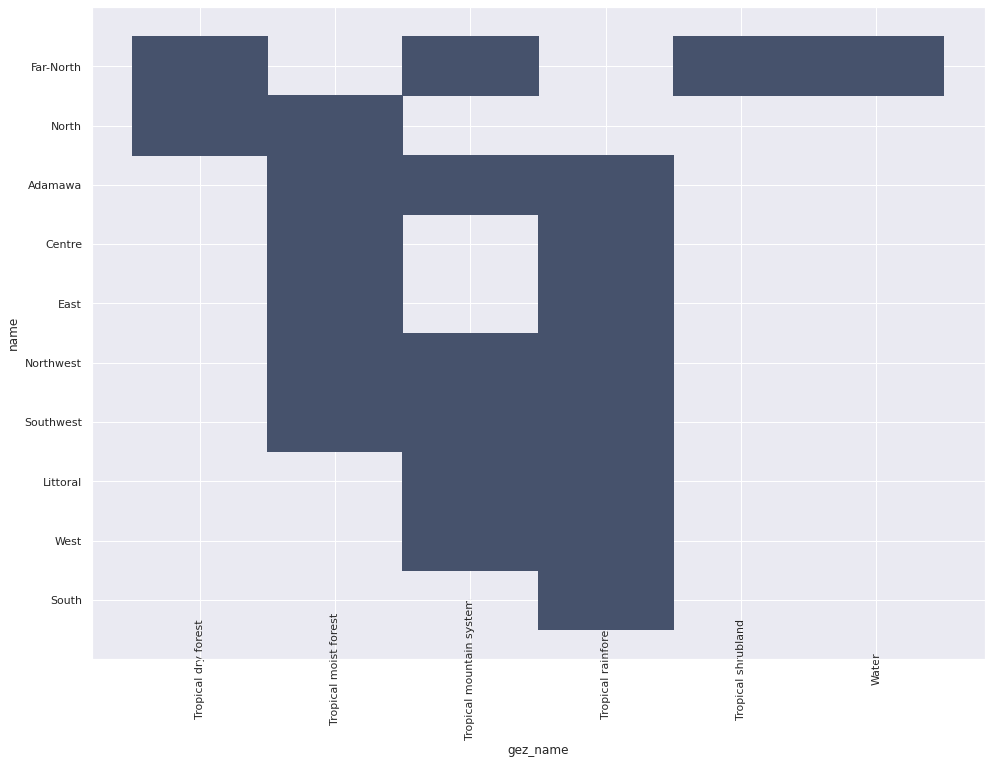

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.set(style="darkgrid")
heat = sns.histplot(data=df_cgez2, x="gez_name", y="name")
#heat.set_xticklabels(heat.get_xticklabels(), rotation=90)  
plt.setp(heat.get_xticklabels(), va="center", rotation=90)
#plt.tick_params(axis='x', which='major', labelsize=30)
plt.show();